In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import imageio
import seaborn as sns

**Plotting Mask RCNN baseline**

In [2]:
epochs = [10, 50, 55, 70, 100]
train_loss = [1.047, 0.5546, 0.5792, 0.453, 0.4773]
val_loss = [2.1598, 2.0665, 2.2597, 2.379, 2.347]
pub_score = [0.209, 0.225, 0.234, 0.234, 0.206]

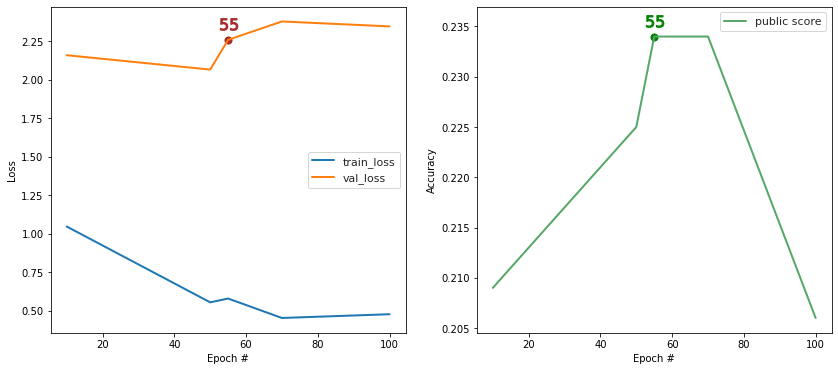

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

sns.lineplot(x=epochs, y=train_loss, ax=axs[0], label='train_loss', linewidth=2)
sns.lineplot(x=epochs, y=val_loss, ax=axs[0], label='val_loss', linewidth=2)
sns.lineplot(x=epochs, y=pub_score, ax=axs[1], label='public score', color='g', linewidth=2)

axs[0].legend(loc=5)
axs[0].set_xlabel('Epoch #')
axs[0].set_ylabel('Loss')
axs[1].set_xlabel('Epoch #')
axs[1].set_ylabel('Accuracy')

axs[0].scatter(epochs[2], val_loss[2],
              color='brown', s=50)
axs[0].scatter(epochs[2], val_loss[2] + 0.1, marker=f'$55$', s=350, 
               zorder=2, color='brown')

axs[1].scatter(epochs[2], pub_score[2],
              color='green', s=50)
axs[1].scatter(epochs[2], pub_score[2] + 1.5e-3, marker=f'$55$', s=350, zorder=2, color='green')

plt.show()

The baseline of Mask RCNN at epoch 55

**Comparing 3 Mosaic implementations**

In [4]:
y = [1.5012, 0.7347, 0.5428, 
     2.4123, 2.4216, 2.0543, 
     0.109 * 100, 0.21 *100, 0.223 * 100,]
x = ['Train loss', 'Train loss', 'Train loss', 
     'Val loss', 'Val loss', 'Val loss', 
     'Public score (%)', 'Public score (%)', 'Public score (%)']
hue = ['Ghép 4 ảnh - Resize', 'Ghép 2 ảnh - Crop', 'Ghép 4 ảnh - Crop',
       'Ghép 4 ảnh - Resize', 'Ghép 2 ảnh - Crop', 'Ghép 4 ảnh - Crop',
       'Ghép 4 ảnh - Resize', 'Ghép 2 ảnh - Crop', 'Ghép 4 ảnh - Crop',]

In [5]:
mosaic_analysis = pd.DataFrame({'Perf': x, 'Value': y, 'Tech': hue})

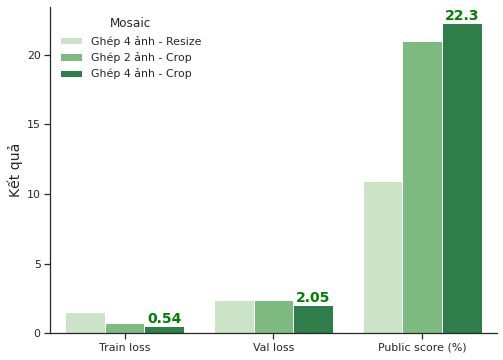

In [6]:
fig = plt.figure(figsize=(8, 6))
axs = plt.subplot(1, 1, 1)

sns.despine()
sns.set_style('ticks')

plots = sns.barplot(data=mosaic_analysis, x='Perf', y='Value', hue='Tech', palette='Greens')

axs.set_xlabel('', fontdict={'size': 14})
axs.set_ylabel('Kết quả', fontdict={'size': 14})
leg = axs.get_legend()
leg.set_title('Mosaic')
leg.set_frame_on(False)

axs.annotate(round(y[2], 2), 
             (plots.patches[6].get_x() + plots.patches[6].get_width() / 2, y[2] + 0.5),
             ha='center', va='center', size=14, color='green', weight='bold')

axs.annotate(round(y[5], 2), 
             (plots.patches[7].get_x() + plots.patches[7].get_width() / 2, y[5] + 0.5),
             ha='center', va='center', size=14, color='green', weight='bold')

axs.annotate('{}'.format(round(y[-1], 2)), 
             (plots.patches[-1].get_x() + plots.patches[-1].get_width() / 2, y[-1] + 0.5),
             ha='center', va='center', size=14, color='green', weight='bold')

plt.show()

In [7]:
x = ['Ghép 4 ảnh - Resize', 'Ghép 2 ảnh - Crop', 'Ghép 4 ảnh - Crop']
y = [5.5, 5.9, 4.5]

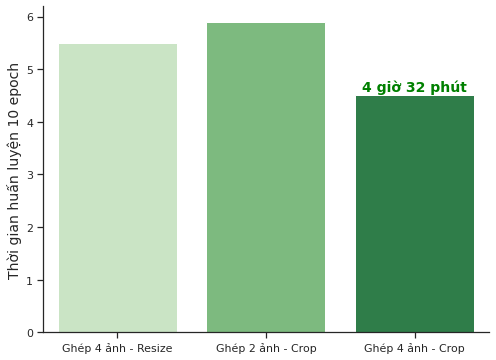

In [8]:
fig = plt.figure(figsize=(8, 6))
axs = plt.subplot(1, 1, 1)

sns.despine()
sns.set_style('ticks')

plots = sns.barplot(x=x, y=y, palette='Greens')

axs.set_ylabel('Thời gian huấn luyện 10 epoch', fontdict={'size': 14})

axs.annotate('4 giờ 32 phút', 
             (plots.patches[-1].get_x() + plots.patches[-1].get_width() / 2, y[-1] + 0.17),
             ha='center', va='center', size=14, color='green', weight='bold')

plt.show()

Merge 4 images then crop is the most efficient implementation

**Choose hyper-param lambda of L2 Regularization**

In [9]:
loss_ft_all = [1.9339, 1.5937, 1.4116, 1.2646, 1.1455, 1.0470, 0.9590, 0.8885, 0.8274, 0.7839,
               1.5430, 1.3459, 1.2090, 1.1024, 1.0131, 0.9388, 0.8823, 0.8308, 0.7826]
val_loss_ft_all = [1.7742, 1.8074, 1.8605, 1.9575, 2.0344, 2.1381, 2.2136, 2.2924, 2.3830, 2.4521,
                   1.8561, 1.9326, 2.0331, 2.1091, 2.1853, 2.2730, 2.3319, 2.4102, 2.4993]
epochs_ft_all = np.arange(19).astype('int')

In [10]:
loss_head = [2.2005, 1.9771, 1.9161, 1.8728, 1.8389, 1.8124, 1.7841, 1.7725, 1.7441, 1.7261,
            1.8344, 1.8076, 1.7772, 1.7580, 1.7368, 1.7166, 1.7051, 1.6869, 1.6702, 1.6591,
            1.6510, 1.6423, 1.6255, 1.6096, 1.5986, 1.5860, 1.5782, 1.5671, 1.5571]
val_loss_head = [1.8743, 1.8614, 1.8451, 1.8397, 1.8329, 1.8263, 1.8255, 1.8305, 1.8389, 1.8215,
                 1.8859, 1.8798, 1.8933, 1.8789, 1.9048, 1.9136, 1.9052, 1.9103, 1.9201, 1.9230,
                 1.9226, 1.9373, 1.9415, 1.9632, 1.9364, 1.9615, 1.9561, 1.9592, 1.9696]
epochs_head = np.arange(29)

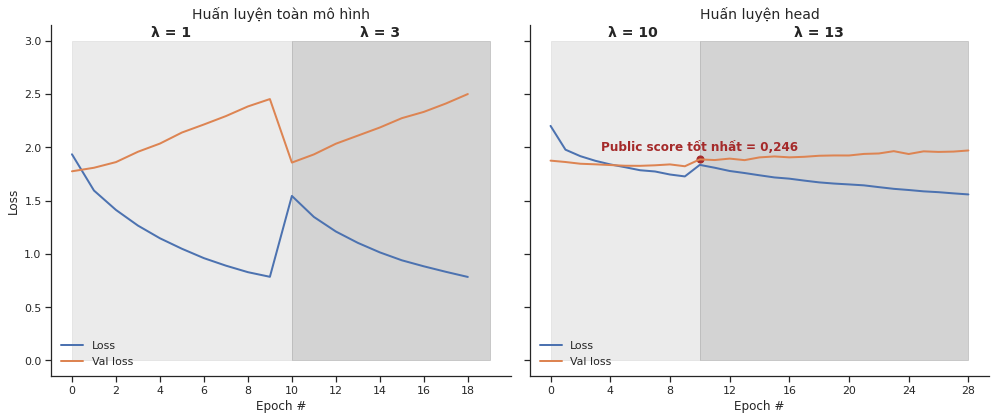

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_palette('dark')
sns.despine()
sns.set_theme(style="ticks", rc=custom_params)

sns.lineplot(x=epochs_ft_all, y=loss_ft_all, ax=axs[0], 
             label='Loss', linewidth=2)
sns.lineplot(x=epochs_ft_all, y=val_loss_ft_all, ax=axs[0], 
             label='Val loss', linewidth=2)
sns.lineplot(x=epochs_head, y=loss_head, ax=axs[1], 
             label='Loss', linewidth=2)
sns.lineplot(x=epochs_head, y=val_loss_head, ax=axs[1], 
             label='Val loss', linewidth=2)

axs[0].set_xticks(np.arange(0, 19, 2))
axs[0].fill_between(np.arange(0, 11), y1=[3] * 11, alpha=0.3, color='silver')
axs[0].fill_between(np.arange(10, 20), y1=[3] * 10, alpha=0.5, color='darkgray')
axs[0].annotate('\u03BB = 1', (4.5, 3.08),
               ha='center', va='center', size=14, weight='bold')
axs[0].annotate('\u03BB = 3', (14, 3.08),
               ha='center', va='center', size=14, weight='bold')
axs[0].set_title('Huấn luyện toàn mô hình', fontdict={'size': 14})

axs[0].legend(loc=3)
axs[0].set_xlabel('Epoch #')
axs[0].set_ylabel('Loss')
axs[0].get_legend().set_frame_on(False)

axs[1].set_xticks(np.arange(0, 30, 4))
axs[1].fill_between(np.arange(0, 11), y1=[3] * 11, alpha=0.3, color='silver')
axs[1].fill_between(np.arange(10, 29), y1=[3] * 19, alpha=0.5, color='darkgray')
axs[1].annotate('\u03BB = 10', (5.5, 3.08),
               ha='center', va='center', size=14, weight='bold')
axs[1].annotate('\u03BB = 13', (18, 3.08),
               ha='center', va='center', size=14, weight='bold')
axs[1].set_title('Huấn luyện head', fontdict={'size': 14})

axs[1].legend(loc=3)
axs[1].set_xlabel('Epoch #')
axs[1].set_ylabel('Loss')
axs[1].get_legend().set_frame_on(False)

axs[1].set_xlabel('Epoch #')

axs[1].scatter(10, 1.8859,
              s=50, color='brown')
axs[1].annotate('Public score tốt nhất = 0,246', (10, 2),
               ha='center', va='center', size=12, color='brown', weight='bold')

plt.tight_layout()
plt.show()